In [0]:
import os
import zipfile


In [0]:
#downloading training dataset from dropbox file
!wget --no-check-certificate \
  https://www.dropbox.com/s/rapmo51wmrvmsnv/gcolab300.zip?dl=0 \-O /tmp/gcolab300.zip

--2019-05-01 23:15:13--  https://www.dropbox.com/s/rapmo51wmrvmsnv/gcolab300.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rapmo51wmrvmsnv/gcolab300.zip [following]
--2019-05-01 23:15:13--  https://www.dropbox.com/s/raw/rapmo51wmrvmsnv/gcolab300.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc09e63ae98ae680d49e6a9657dc.dl.dropboxusercontent.com/cd/0/inline/AgHB86PHvDp9f4pnnSq2y5fT5lTwZm8mcn1JrrmH8OKBO1UlLc8idlR2GzIgDhcyRDIOZJ1joIxFSOwqtwRV4y3WbMvzeoSKXgLZovYGC-ULSA/file# [following]
--2019-05-01 23:15:14--  https://uc09e63ae98ae680d49e6a9657dc.dl.dropboxusercontent.com/cd/0/inline/AgHB86PHvDp9f4pnnSq2y5fT5lTwZm8mcn1JrrmH8OKBO1UlLc8idlR2GzIgDhcyRDIOZJ1joIxFSOwqtwRV4y3WbMvzeoSKXgLZovYGC-ULSA/file
Resolvin

In [0]:
#extracting zip file for training
local_zip= '/tmp/gcolab300.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/gcolab300')
zip_ref.close()


In [0]:
#defining each of our directories
# Directory with our training animals pictures
train_animals_dir = os.path.join('/tmp/gcolab300/gcolab300/animals')

# Directory with our training human pictures
train_humans_dir = os.path.join('/tmp/gcolab300/gcolab300/humans')


In [0]:
#seeeing what our file names look like
#name doesn't matter, since labels are created with directory file name (animals and humans)
train_animals_names= os.listdir(train_animals_dir)
print(train_animals_names[:10])

train_humans_names= os.listdir(train_humans_dir)
print(train_humans_names[:10])

['abc123148.jpg', '1237.jpg', 'abc12367.jpg', 'abc12391.jpg', 'abc123110.jpg', '1111.jpg', '12310.jpg', 'abc123163.jpg', '1Final_Mask2.jpg', 'aa26.jpg']
['bba33311.jpg', 'zxcz9.jpg', 'qwe5.jpg', 'qwe2.jpg', 'b11111120.jpg', '33375.jpg', '33330.jpg', '144414.jpg', '1111.jpg', '33326.jpg']


In [0]:
#printing total number of animals and humans in each file
print('total training animals images:', len(os.listdir(train_animals_dir)))
print('total training humans images:', len(os.listdir(train_humans_dir)))

total training animals images: 350
total training humans images: 263


In [0]:
#looking at some of the photos to see what they look like
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#parameters for our graph, we'll output images in a 4x4 cconfiguration
nrows = 4
ncols = 4

#index for iterating over images
pic_index = 0


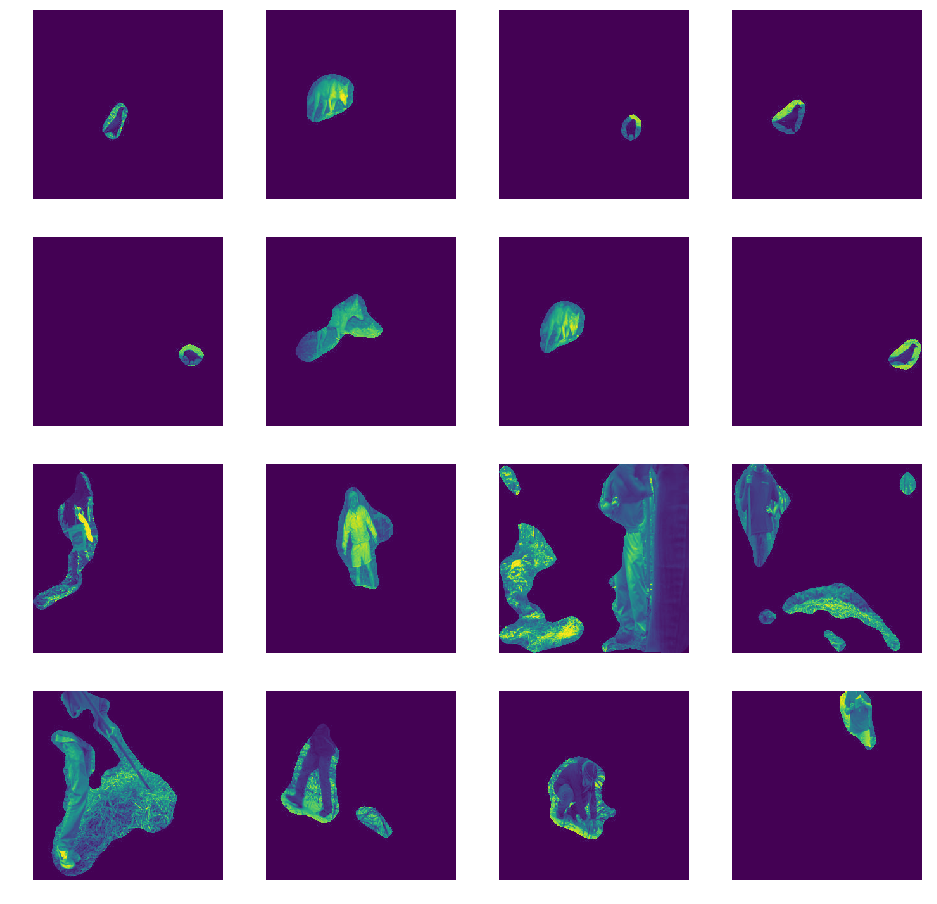

In [0]:
#displaying a batch of 8 animals and 8 human images, re-running will refresh the batch
#setting up matplotlib fig, and sizing it to fit 4x4 images
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_animals_pix = [os.path.join(train_animals_dir, fname)
  for fname in train_animals_names[pic_index-8:pic_index]]
next_humans_pix = [os.path.join(train_humans_dir, fname)
  for fname in train_humans_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_animals_pix+next_humans_pix):
  #set up subplot, indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') #removing axis
  
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [0]:
#define model (Convolution Neural Network) and import tensorflow
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('acc')>0.995):
      print(' Reached 99.9% accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = myCallback()
      


In [0]:
#add convolutional layers, and flatten the final result to feed into the densely connected layers
#since we are doing binary classification (animals v humans) we are going to use sigmoid function (0 v 1)

model = tf.keras.models.Sequential([
    #the input shape is the desired size of the image with 3 bytes of color
    #first covolution
    tf.keras.layers.Conv2D(4, (3,3), activation = 'relu', input_shape = (300, 300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #second convolution layer
    tf.keras.layers.Conv2D(4, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third convolution layer
    tf.keras.layers.Conv2D(4, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth convolution
    tf.keras.layers.Conv2D(4, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fifth convolution
    tf.keras.layers.Conv2D(4, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten the results to a DNN
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer (Dense == neurons)
    tf.keras.layers.Dense(256, activation = 'relu'),
    #only 1 output neuron, this will contain a value from 0-1 where 0 is class 'animals' and 1 is the "other" a.k.a class 'humans'
    tf.keras.layers.Dense(1, activation= 'sigmoid')    
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#the model.summary() method call prints a summary of the neural network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 4)       112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 4)       148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 4)         148       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 4)         148       
__________

In [0]:
'''the output shape column shows how the size of the feature map evolves in each successive layer, and the convolution layers reduce the size of the feature maps by a bit due to the padding
and each pooling layer halves the dimensions. 
we will now configure the specifications for the model training. 
The final training will be doen with the binary_crossentropy loss, because it is a binary classification problem, and our final activation is a sigmoid. The rmsprop optimizer with a learning rate
of 0.001 will be used. During classification, accuracy will be monitored.'''

from tensorflow.keras.optimizers import RMSprop

model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics= ['acc'])

In [0]:
#preprocessing the data
'''
setting up data generators will read the pictures at the source folders, convert them to float32 tensors, and feed them (with source folder labels) to our network.
The generators will yield a batch size of 300x300 images (as defined before because we know the size of the images). 
pixels will be normalized (multiplied by 1/255) to make it more amenable to processing by the network (such that they are in the [0,1] range)
'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#all images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale= 1/255)

#fllow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/gcolab300/gcolab300/', #this is the directory for all training images
    target_size = (300,300), #all images will be resized to 300x300
    batch_size = 128,
    #since we use binary_crossentropy loss, we need binary labels
    class_mode = 'binary')

Found 613 images belonging to 2 classes.


In [0]:
#training for 15 epochs
#loss and accuracy are a great indication of the progress of training, it makes a guess to the classification of the training data, and measures it against the known variable, calculating the result
#accuracy is the portion of the correct guesses

history= model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs=15,
    verbose=1,
    callbacks = [callbacks])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
5/5 [==============================] - 6s 1s/step - loss: 0.6775 - acc: 0.7031
Epoch 2/15
5/5 [==============================] - 1s 112ms/step - loss: 0.5685 - acc: 0.8646
Epoch 3/15
5/5 [==============================] - 1s 231ms/step - loss: 0.4168 - acc: 0.8940
Epoch 4/15
5/5 [==============================] - 1s 259ms/step - loss: 0.3381 - acc: 0.9266
Epoch 5/15
5/5 [==============================] - 1s 266ms/step - loss: 0.2506 - acc: 0.9560
Epoch 6/15
5/5 [==============================] - 1s 242ms/step - loss: 0.2004 - acc: 0.9560
Epoch 7/15
5/5 [==============================] - 1s 240ms/step - loss: 0.1550 - acc: 0.9560
Epoch 8/15
5/5 [==============================] - 1s 241ms/step - loss: 0.1108 - acc: 0.9755
Epoch 9/15
5/5 [==============================] - 1s 237ms/step - loss: 0.1013 - acc: 0.9723
Epoch 10/15
5/5 [==============================] - 1s 253ms/step - loss: 0.0852 - acc: 0.9788
Epoch 11/15
5/5 [=======

In [0]:
#running a prediction using the model, user selects file
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  #predicting images
  path = '/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + ' is class humans')
  else:
    print(fn + ' is class animals')

Using TensorFlow backend.


Saving fig2.ex.jpg to fig2.ex.jpg
[1.]
fig2.ex.jpg is class humans


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


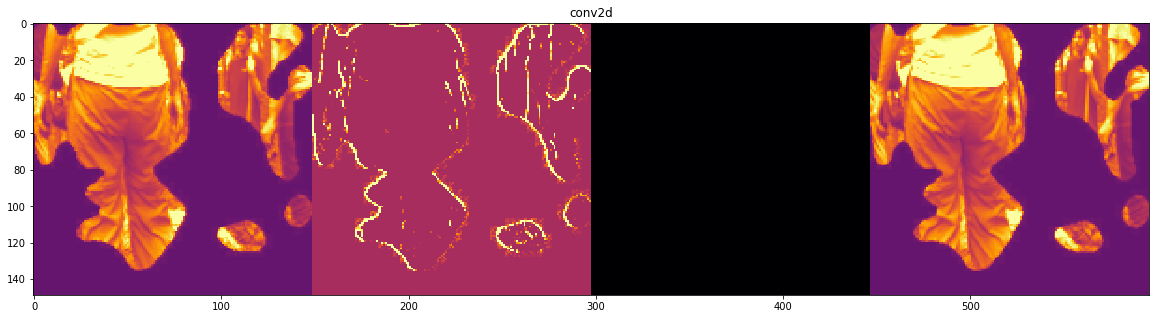

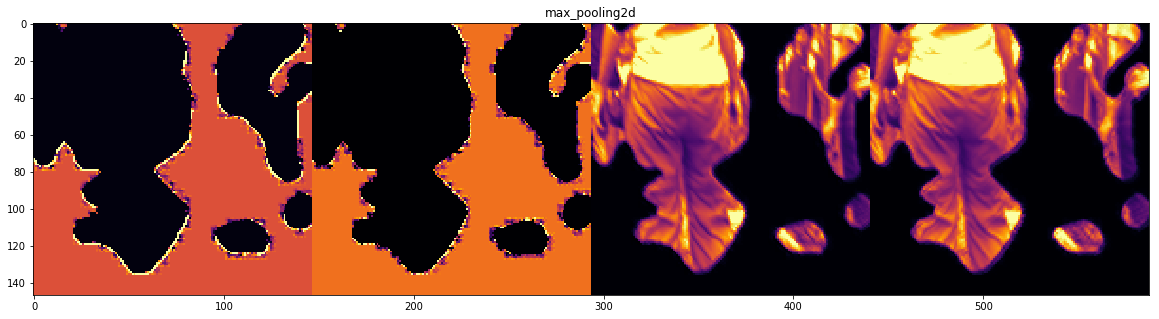

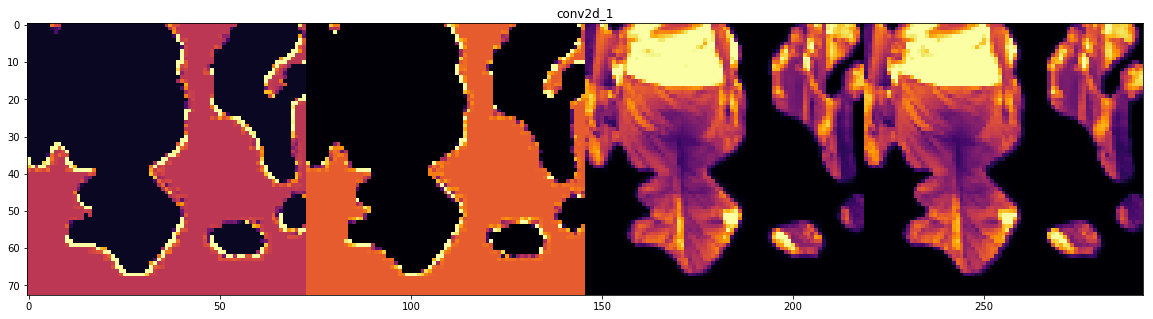

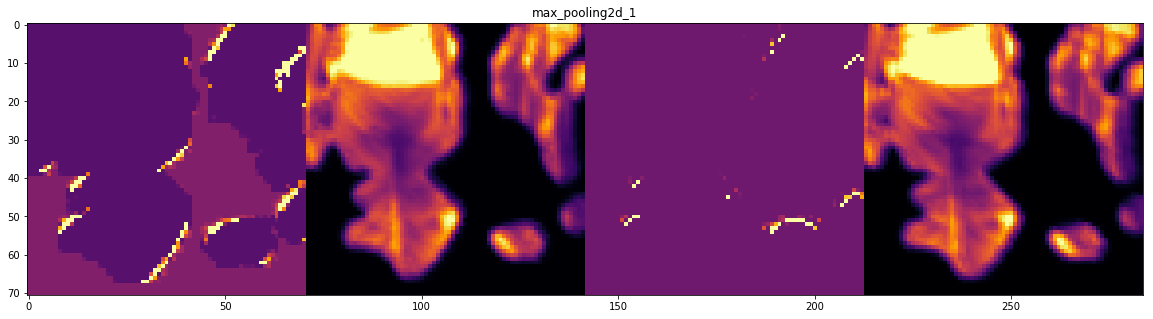

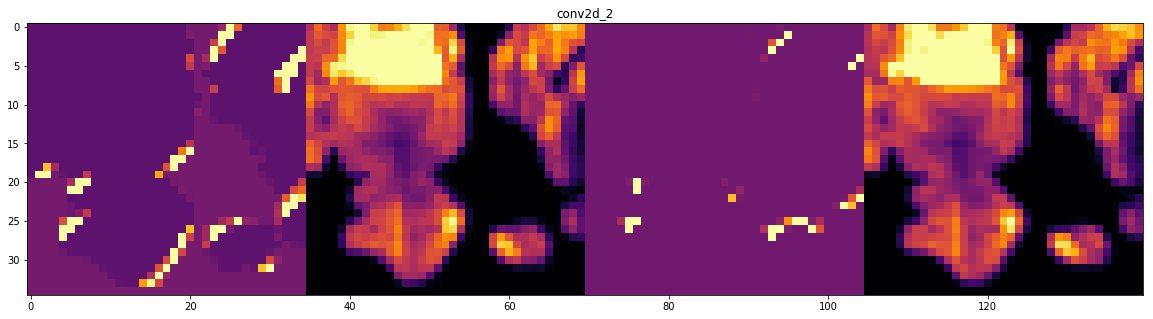

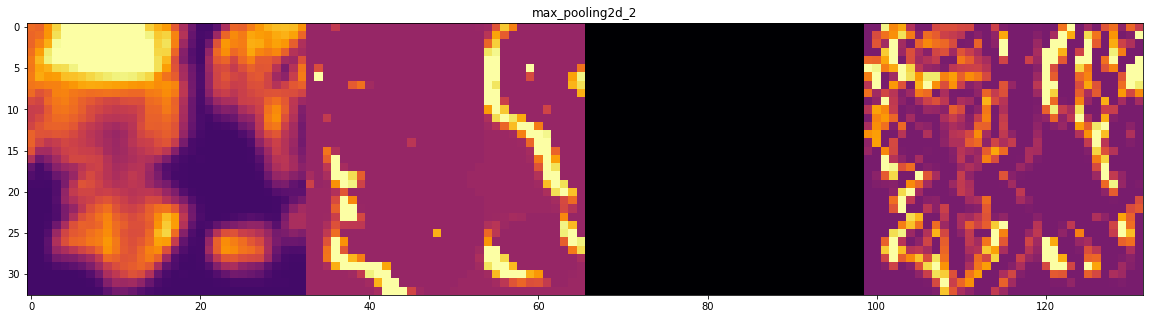

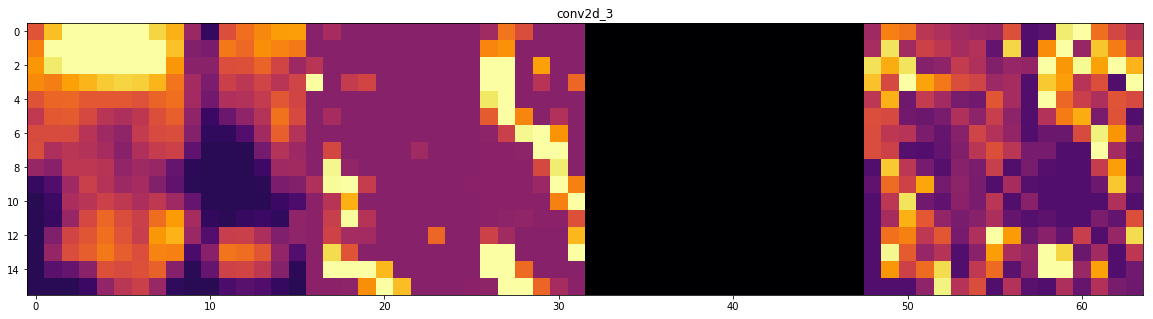

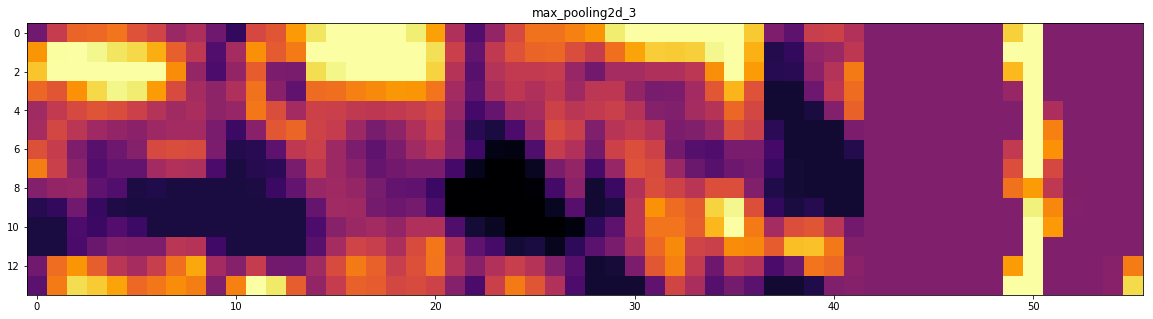

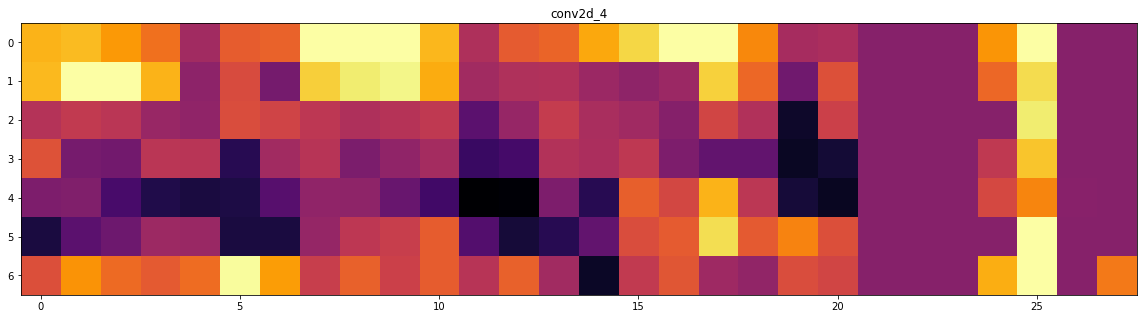

In [0]:


#visualizing intermediate representations
#pick random images from the training set and generate a figure where each row is the output of a layer and each image in the row is a specific filter in that output feature map

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#define a new model that will take an image as an input, and output the intermediate representations for al layers in the previous model after the first

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs= model.input, outputs = successive_outputs)
#prepare a random input image from the training set
animals_img_files = [os.path.join(train_animals_dir, f) for f in train_animals_names]
humans_img_files = [os.path.join(train_humans_dir, f) for f in train_humans_names]
img_path = random.choice(animals_img_files + humans_img_files)

img = load_img(img_path, target_size = (300,300))
x = img_to_array(img)
x =  x.reshape((1,) + x.shape)
x /= 255

#running image through the network
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

#running the visualizations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4 :
    #only doing the conv/maxpool layers, not the fully connected layers
    n_features = feature_map.shape[-1] #number of features in the map
    #feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    #tiling the images in the grid
    display_grid = np.zeros((size, size*n_features))
    for i in range(n_features):
      #postprocess the feature to make it visually effective
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x , 0, 255).astype('uint8')
      #tiling each filter into a bigger horizontal grid
      
      display_grid[:, i*size : (i+1)*size] = x
      #display_grid = x
      
    #display the grid
    scale = 20./ n_features
    plt.figure(figsize=(scale*n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'inferno')





In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)